In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as mp
import warnings
import string
import re

<span style="font-size:28px;color:white; font-family:'Fira Sans', 'Fira Mono', sans-serif;">
ANALYZE UNEMPLOYMENT DATA RATE REPRESENTING UNEMPLOYMENT POPULATION
</span>


Descriptive Statistics:
count    267.000000
mean       2.302539
std        0.762139
min        0.405465
25%        1.765504
50%        2.365560
75%        2.876658
max        4.341855
Name: estimated_unemployment_rate_(%), dtype: float64


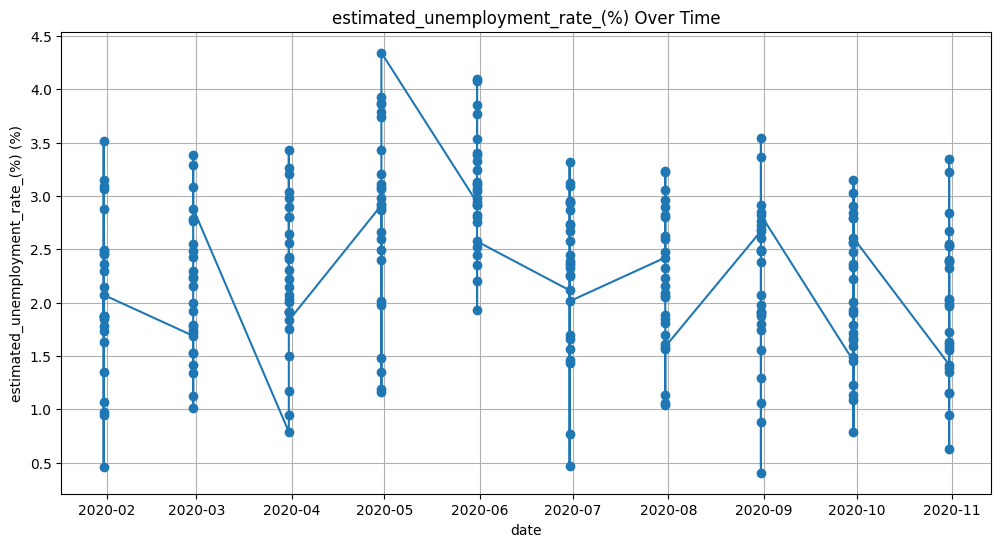

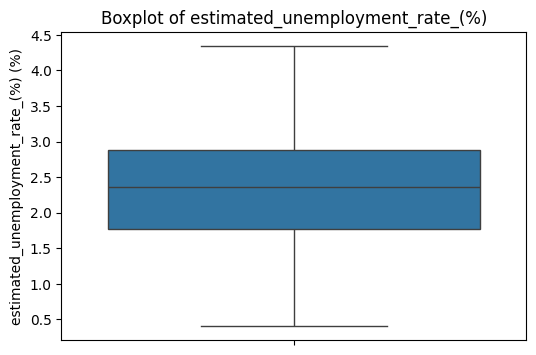

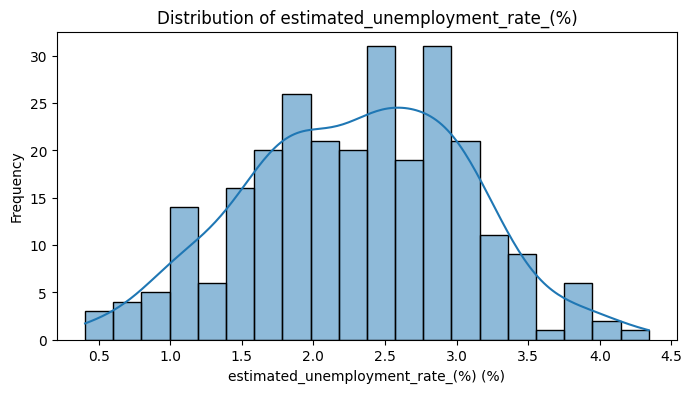

In [103]:
#Descriptive Statistics
print("Descriptive Statistics:")
print(df['estimated_unemployment_rate_(%)'].describe())

#Line plot
mp.figure(figsize=(12, 6))
mp.plot(df['date'], df['estimated_unemployment_rate_(%)'], marker='o')
mp.title('estimated_unemployment_rate_(%) Over Time')
mp.xlabel('date')
mp.ylabel('estimated_unemployment_rate_(%) (%)')
mp.grid(True)
mp.show()

#Boxplot
mp.figure(figsize=(6, 4))
sns.boxplot(y=df['estimated_unemployment_rate_(%)'])
mp.title('Boxplot of estimated_unemployment_rate_(%)')
mp.ylabel('estimated_unemployment_rate_(%) (%)')
mp.show()

#(Distribution)
mp.figure(figsize=(8, 4))
sns.histplot(df['estimated_unemployment_rate_(%)'], bins=20, kde=True)
mp.title('Distribution of estimated_unemployment_rate_(%)')
mp.xlabel('estimated_unemployment_rate_(%) (%)')
mp.ylabel('Frequency')
mp.show()

#Correlation with Other Variables
if 'GDP' in df.columns:
    corr = df['estimated_unemployment_rate_(%)'].corr(df['GDP'])
    print(f"Correlation between estimated_unemployment_rate_(%) and GDP: {corr:.2f}")

DATA CLEANING

In [104]:

df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   region                                   267 non-null    object        
 1   date                                     267 non-null    datetime64[ns]
 2   frequency                                267 non-null    object        
 3   estimated_unemployment_rate_(%)          267 non-null    float64       
 4   estimated_employed                       267 non-null    float64       
 5   estimated_labour_participation_rate_(%)  267 non-null    float64       
 6   region.1                                 267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
 9   estimated_labour_participation_rate      267 non

In [105]:
df.describe()


,date,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),longitude,latitude,estimated_labour_participation_rate
count,267,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,2.302539,15.774818,41.681573,22.826048,80.532425,3.737598
min,2020-01-31 00:00:00,0.405465,11.674560,16.770000,10.850500,71.192400,2.877512
25%,2020-03-31 00:00:00,1.765504,14.858322,37.265000,18.112400,76.085600,3.644535
50%,2020-06-30 00:00:00,2.365560,16.090973,40.390000,23.610200,79.019300,3.723039
75%,2020-08-31 00:00:00,2.876658,16.900981,44.055000,27.278400,85.279900,3.807879
max,2020-10-31 00:00:00,4.341855,17.900373,69.690000,33.778200,92.937600,4.258304
std,NaN,0.762139,1.434786,7.845419,6.270731,5.831738,0.180187


In [106]:
df.isnull().sum()
df.drop_duplicates()
df.dtypes

region                                             object
date                                       datetime64[ns]
frequency                                          object
estimated_unemployment_rate_(%)                   float64
estimated_employed                                float64
estimated_labour_participation_rate_(%)           float64
region.1                                           object
longitude                                         float64
latitude                                          float64
estimated_labour_participation_rate               float64
Period                                             object
dtype: object

In [107]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns=df.columns.str.strip()
df=df.astype({'estimated_employed':'float64'})
df['date']=pd.to_datetime(df['date'])

In [108]:
df.ffill()
cats=df.select_dtypes(include=['object','string'])
nums=df.select_dtypes(include=['number'])
cats.dtypes
nums.dtypes
outlier_counts=detect_outliers_iqr(nums)


In [109]:
def detect_outliers_iqr(nums):
    outliers_dict = {}
    for col in nums:
        Q1 = nums[col].quantile(0.25)
        Q3 = nums[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(nums[col] < lower_bound) | (nums[col] > upper_bound)]
        outliers_dict[col] = len(outliers)
    return pd.Series(outliers_dict).sort_values(ascending=False)

# Usage:
print(outlier_counts)


estimated_labour_participation_rate_(%)    29
estimated_labour_participation_rate        24
estimated_employed                          1
estimated_unemployment_rate_(%)             0
longitude                                   0
latitude                                    0
dtype: int64


Possible Cause	Action
✅ Data entry or measurement error	Remove or correct it
✅ Rare but valid extreme values	Keep or cap (depending on goal)
✅ Valid values but skew distribution	Transform (e.g., log, box-cox)
✅ Context-specific anomaly (e.g., fraud)	Flag as outlier, use for models

In [110]:
df['estimated_labour_participation_rate'] = np.log1p(df['estimated_labour_participation_rate_(%)'])
df['estimated_unemployment_rate_(%)'] = np.log1p(df['estimated_unemployment_rate_(%)'])
df['estimated_employed'] = np.log1p(df['estimated_employed'])


<span style="font-size:28px;color:white; font-family:'Fira Sans', 'Fira Mono', sans-serif;">
IDENTIFYING PATTERNS
</span>


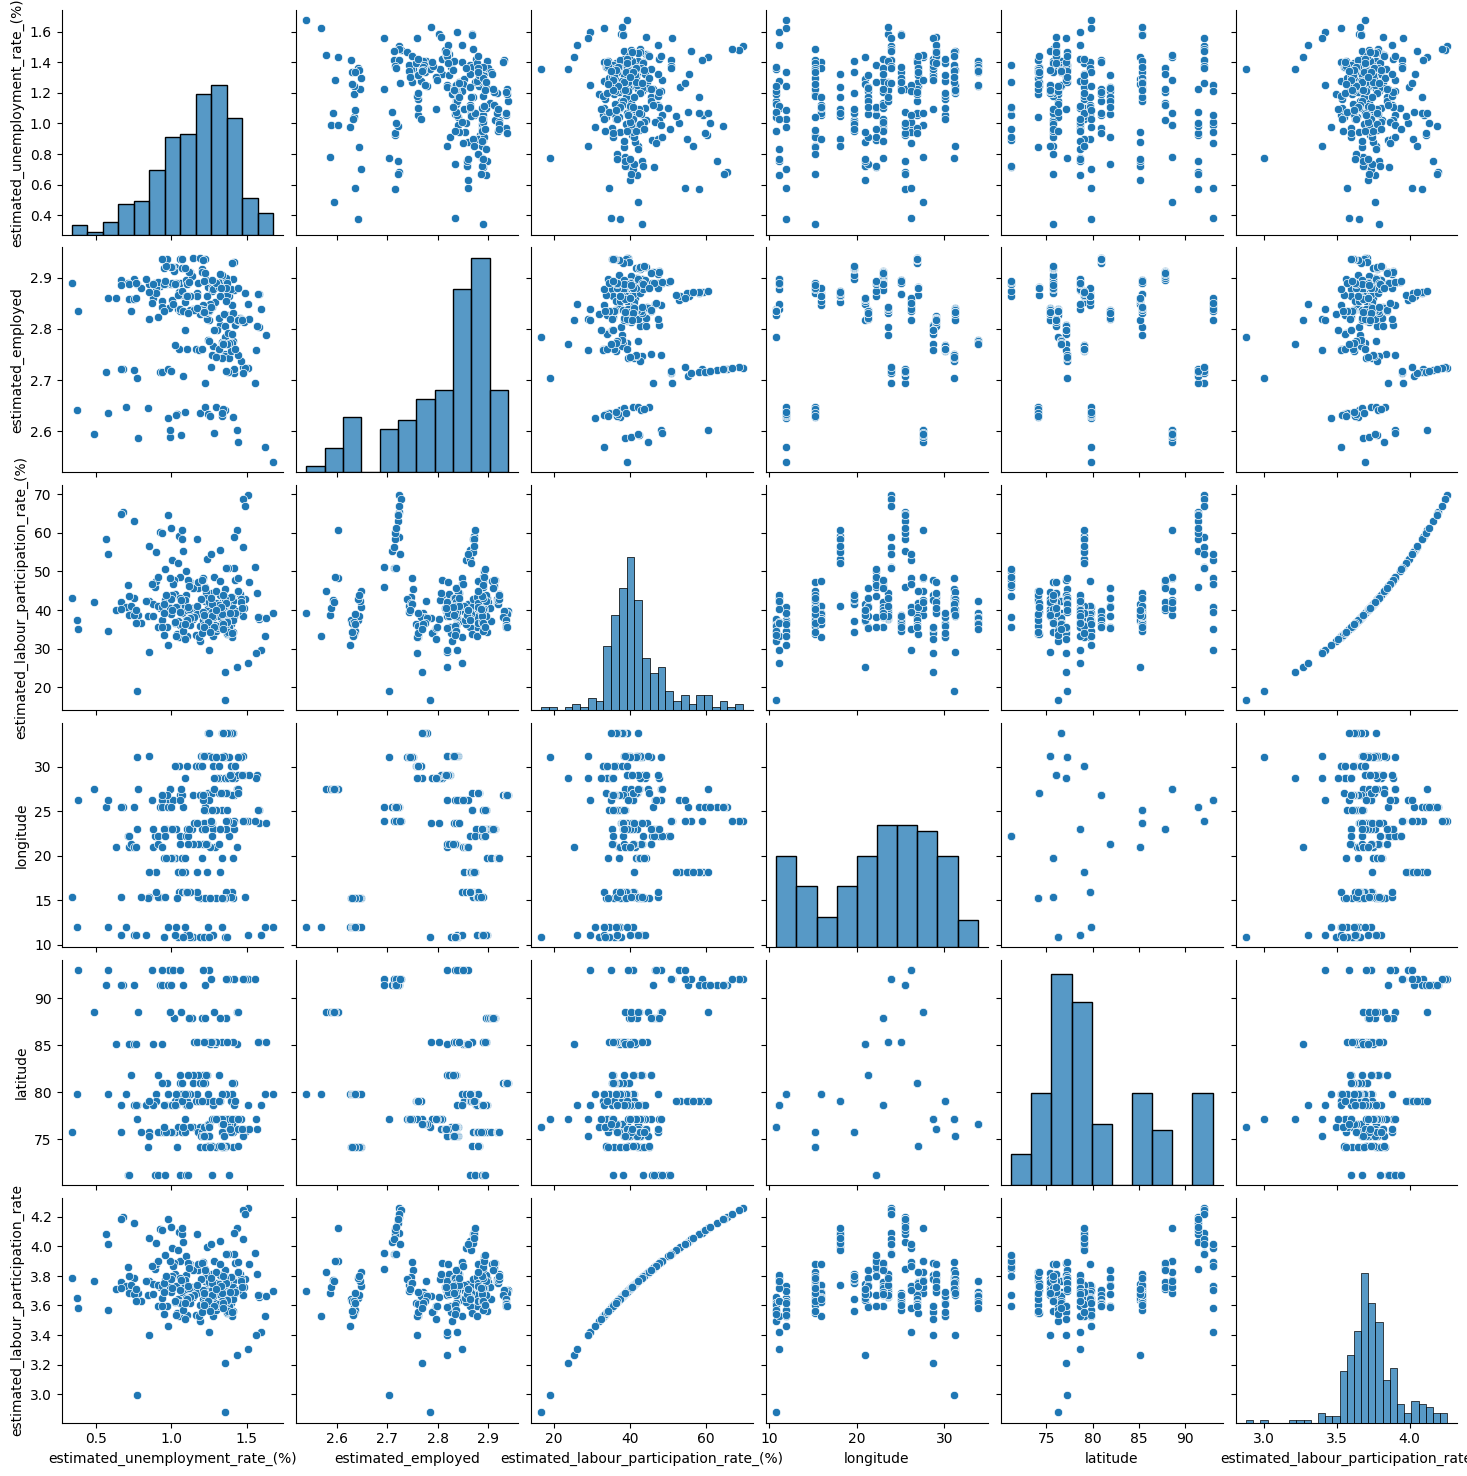

In [111]:
sns.pairplot(df)
mp.show()



📈 Analyzing Numerical Column: estimated_unemployment_rate_(%)


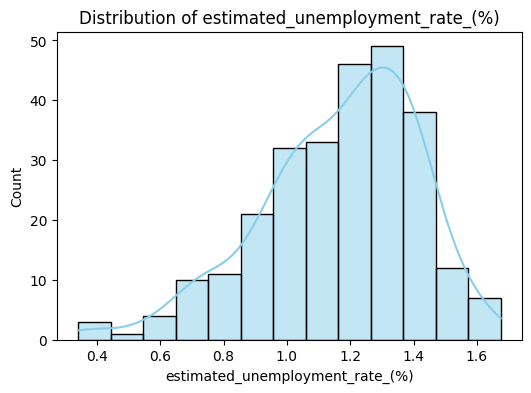

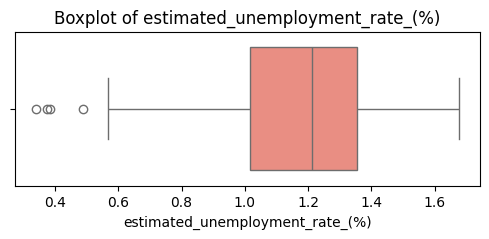

Skewness: -0.70, Kurtosis: 0.38
Outliers detected in estimated_unemployment_rate_(%): 4

📈 Analyzing Numerical Column: estimated_employed


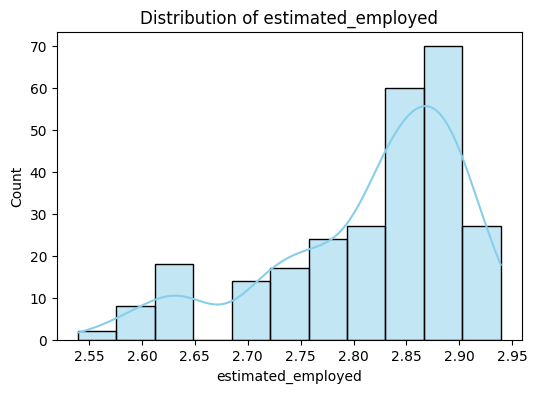

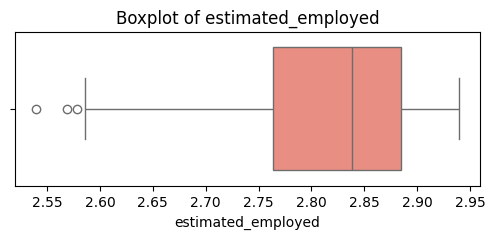

Skewness: -1.04, Kurtosis: 0.34
Outliers detected in estimated_employed: 3

📈 Analyzing Numerical Column: estimated_labour_participation_rate_(%)


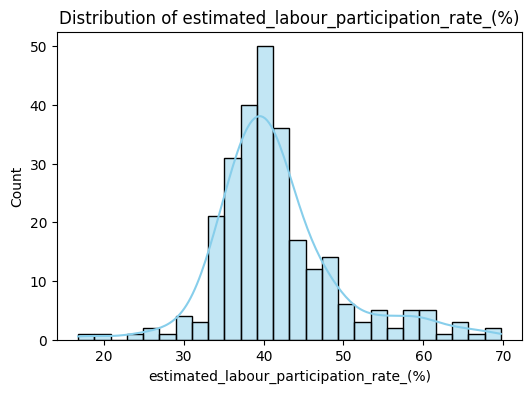

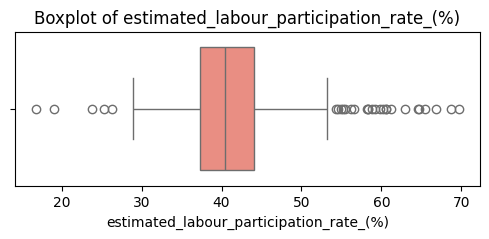

Skewness: 0.98, Kurtosis: 2.21
Outliers detected in estimated_labour_participation_rate_(%): 29

📈 Analyzing Numerical Column: longitude


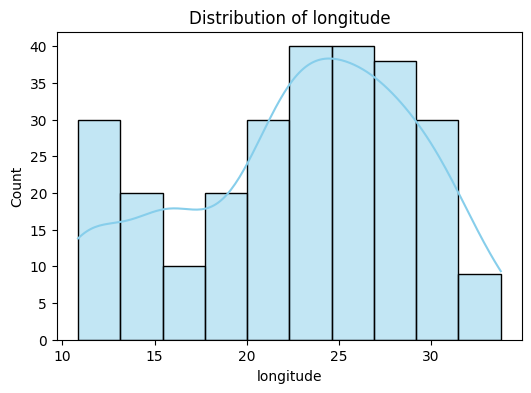

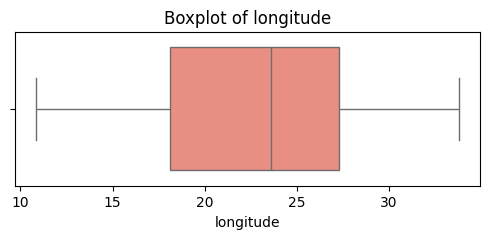

Skewness: -0.38, Kurtosis: -0.75
Outliers detected in longitude: 0

📈 Analyzing Numerical Column: latitude


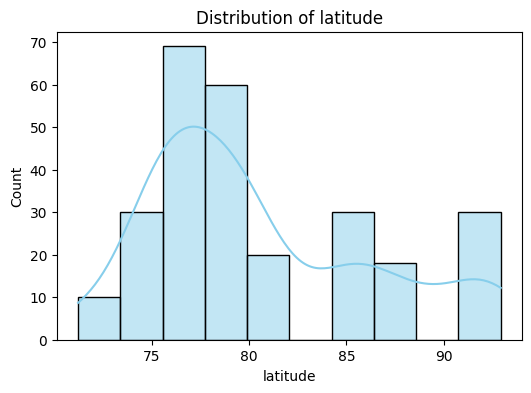

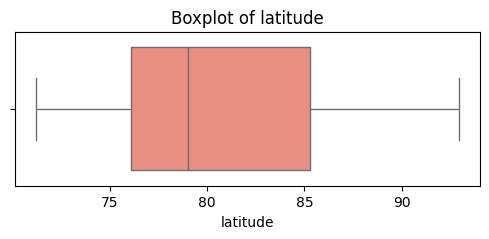

Skewness: 0.72, Kurtosis: -0.50
Outliers detected in latitude: 0

📈 Analyzing Numerical Column: estimated_labour_participation_rate


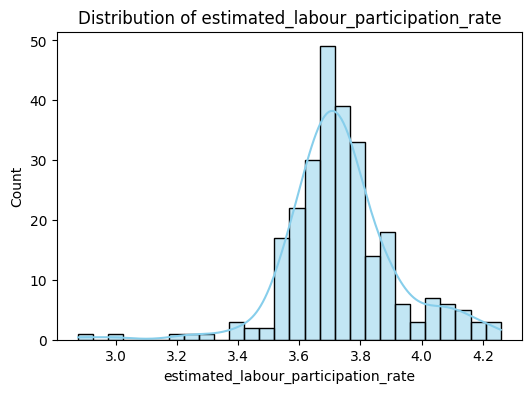

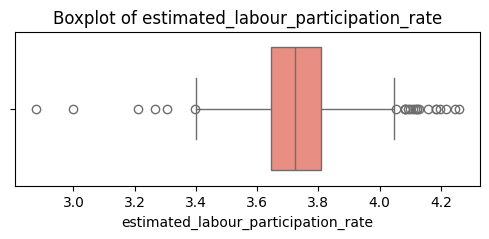

Skewness: -0.13, Kurtosis: 3.24
Outliers detected in estimated_labour_participation_rate: 24


In [112]:
for col in nums:
        print(f"\n📈 Analyzing Numerical Column: {col}")

        # Histogram + KDE
        mp.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, color='skyblue')
        mp.title(f'Distribution of {col}')
        mp.show()

        # Boxplot for outliers
        mp.figure(figsize=(6, 2))
        sns.boxplot(x=df[col], color='salmon')
        mp.title(f'Boxplot of {col}')
        mp.show()

        # Skewness and Kurtosis
        print(f"Skewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurt():.2f}")

        # IQR-based outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"Outliers detected in {col}: {len(outliers)}")

CORRELATION MATRIX

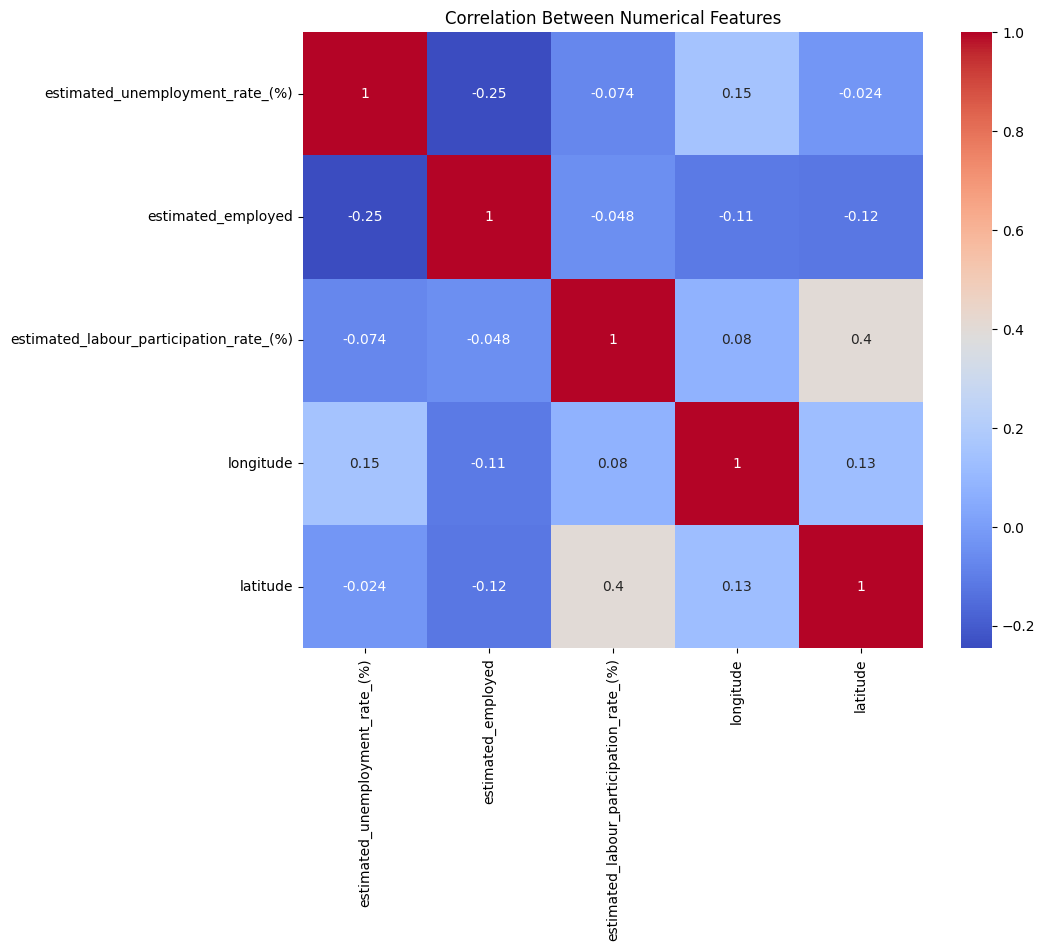

In [ ]:
corr = nums.corr()
# Plot heatmap
mp.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
mp.title('Correlation Between Numerical Features')
mp.show()

<span style="font-size:28px;color:white; font-family:'Fira Sans', 'Fira Mono', sans-serif;">
IMPACT OF COVID ON UNEMPLOYMENT RATE
</span>


In [ ]:
df = df.sort_values(by='date')

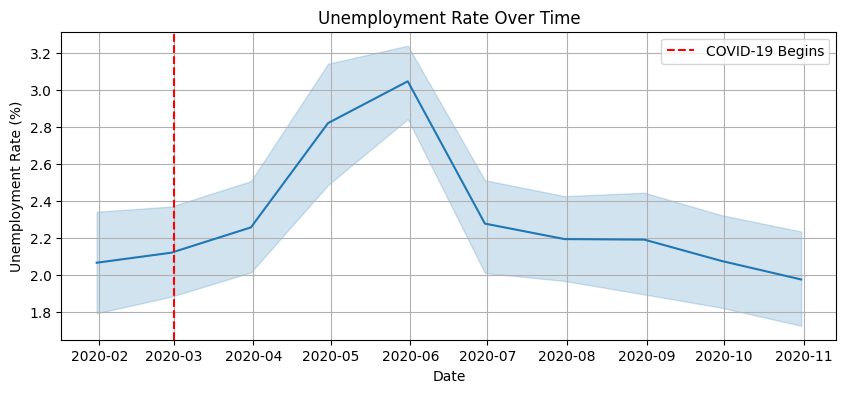

In [ ]:
mp.figure(figsize=(10, 4))
sns.lineplot(x='date', y='estimated_unemployment_rate_(%)', data=df)
mp.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='COVID-19 Begins')
mp.title('Unemployment Rate Over Time')
mp.xlabel('Date')
mp.ylabel('Unemployment Rate (%)')
mp.legend()
mp.grid(True)
mp.show()


In [ ]:
pre_covid = df[df['date'] < '2020-03-01']
post_covid = df[df['date'] >= '2020-03-01']

print("📉 Pre-COVID Unemployment:")
print(pre_covid['estimated_unemployment_rate_(%)'].describe())

print("\n📈 Post-COVID Unemployment:")
print(post_covid['estimated_unemployment_rate_(%)'].describe())


📉 Pre-COVID Unemployment:
count    52.000000
mean      2.093584
std       0.693324
min       0.457425
25%       1.710109
50%       2.035343
75%       2.485311
max       3.516607
Name: estimated_unemployment_rate_(%), dtype: float64

📈 Post-COVID Unemployment:
count    215.000000
mean       2.353076
std        0.770886
min        0.405465
25%        1.818793
50%        2.407846
75%        2.911262
max        4.341855
Name: estimated_unemployment_rate_(%), dtype: float64


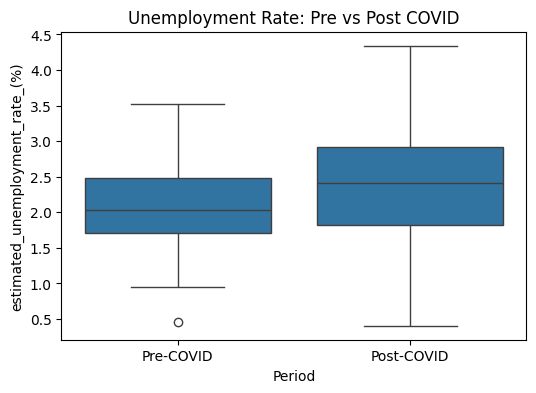

In [ ]:
df['Period'] = np.where(df['date'] < '2020-03-01', 'Pre-COVID', 'Post-COVID')

mp.figure(figsize=(6, 4))
sns.boxplot(x='Period', y='estimated_unemployment_rate_(%)', data=df)
mp.title('Unemployment Rate: Pre vs Post COVID')
mp.show()


In [ ]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(
    pre_covid['estimated_unemployment_rate_(%)'],
    post_covid['estimated_unemployment_rate_(%)'],
    equal_var=False
)

print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_val:.4f}")


T-Statistic: -2.37, P-Value: 0.0202


Based on the analysis of unemployment data, here are **insights that could inform economic or social policies**:

---

### ✅ **Insights for Policy Recommendations:**

1. **Sharp Rise in Unemployment Post-COVID**

   * **Insight**: A significant increase in unemployment rates is observed after March 2020, confirmed by statistical testing (T-test results).
   * **Policy Implication**: Governments should develop **contingency unemployment assistance** programs that can be rapidly deployed during future crises (e.g., pandemics, natural disasters).

2. **Regional Unemployment Disparities**

   * **Insight**: Bar plots show that unemployment rates vary significantly across states.
   * **Policy Implication**: Design **region-specific job creation strategies** and investment incentives to address localized labor market issues.

3. **High Skewness and Outliers in Employment Metrics**

   * **Insight**: Skewed distributions and outliers suggest **unequal employment opportunities or reporting** across sectors or regions.
   * **Policy Implication**: Consider **retraining programs or targeted education** in areas with consistently high unemployment or low participation rates.

4. **Correlation with Economic Indicators (e.g., GDP)**

   * **Insight**: Negative correlation with GDP (if significant) suggests economic output affects job availability.
   * **Policy Implication**: Strengthen **macro-economic stabilization tools**, such as infrastructure spending, to stimulate job growth during downturns.

5. **Seasonal Patterns Detected**

   * **Insight**: Seasonal trends may indicate dependence on cyclical industries like agriculture or tourism.
   * **Policy Implication**: Implement **seasonal employment support**, such as temporary job subsidies or training programs during off-peak seasons.

6. **Labor Participation Rate Log-Transformed**

   * **Insight**: Transformed data reveals patterns in how many people are actively seeking work.
   * **Policy Implication**: Increase **labor market engagement** by improving childcare access, transportation, or flexible work options.

---

These insights provide a data-driven foundation for creating responsive and inclusive economic and labor market policies.
